In 2015, a data journalist named Walt Hickey analyzed moving ratings data and found strong evidence to suggest that Fandango's rating system was biased and generally higher than actual ratings submitted. Since then, Fandango has reported the issue as a bug in the system and promised to address the fix. 

The goal of this project is to analyze the Fandango movie ratings data to investigate a more recent data set to confirm if the discrepancy still exists. 

The project will compare Fandango's ratings previous and after Hickey's analysis. 

import libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

read in data sets:
-  fandango_score_comparison.csv is from Walt Hickey's previuos analysis
-  movie_ratings_16_17.csv is a data set prepared by Dataquest

In [2]:
fandango_score_comparison=pd.read_csv('fandango_score_comparison.csv')
movie_ratings_16_17=pd.read_csv('movie_ratings_16_17.csv')

explore data sets: 

In [8]:
for each_column in fandango_score_comparison.columns:
    print(each_column)
for each_column in movie_ratings_16_17.columns:
    print(each_column)

FILM
RottenTomatoes
RottenTomatoes_User
Metacritic
Metacritic_User
IMDB
Fandango_Stars
Fandango_Ratingvalue
RT_norm
RT_user_norm
Metacritic_norm
Metacritic_user_nom
IMDB_norm
RT_norm_round
RT_user_norm_round
Metacritic_norm_round
Metacritic_user_norm_round
IMDB_norm_round
Metacritic_user_vote_count
IMDB_user_vote_count
Fandango_votes
Fandango_Difference
movie
year
metascore
imdb
tmeter
audience
fandango
n_metascore
n_imdb
n_tmeter
n_audience
nr_metascore
nr_imdb
nr_tmeter
nr_audience


In [21]:
fandango_columns=[
    'FILM',
    'Fandango_Stars',
    'Fandango_Ratingvalue',
    'Fandango_votes', 
    'Fandango_Difference']
ratings_columns=['movie', 'year', 'fandango']
ratings_data_pre=fandango_score_comparison[fandango_columns].copy()
ratings_data_post=movie_ratings_16_17[ratings_columns].copy()

the population would be the entire universe of movies that fandango has ratings on

however, the sample that has been selected includes only films that have at least 30 fan reviews in the pre-analysis data set and the sample from the post-analysis data set only include popular films

there could be potential bias in the data because films were not randomly selected

as such, the project definition will be modified to specify that only "popular" films will be analyzed

check if the definition of "popular" is the same across the two data sets

-  check if the pre-analysis data set contains only movies that has more than 30 fan votes

In [13]:
print(sum(fandango_data['Fandango_votes']<30))

0


-  since the post-analysis data set doesn't have data on number of fan votes, manually check if a random sample of films have more than 30 fan votes on Fandango's site

In [17]:
print(ratings_data_post.sample(10, random_state=1))

                                       movie  year  fandango
108                   Mechanic: Resurrection  2016       4.0
206                                 Warcraft  2016       4.0
106                                Max Steel  2016       3.5
107                            Me Before You  2016       4.5
51   Fantastic Beasts and Where to Find Them  2016       4.5
33                                      Cell  2016       3.0
59                                    Genius  2016       3.5
152                                    Sully  2016       4.5
4                    A Hologram for the King  2016       3.0
31                Captain America: Civil War  2016       4.5


### confirmed that majority of the above films had > 100 fan votes

confirm the data set included in the pre-analysis data set is before the reporting

In [61]:
pattern=r"\((\d*)\)"
ratings_data_pre['Year Released']=ratings_data_pre['FILM'].str.extract(pattern, expand=False).astype(int)

In [62]:
print(ratings_data_pre['Year Released'].value_counts(dropna=False))
print(ratings_data_post['year'].value_counts(dropna=False))

2015    129
2014     17
Name: Year Released, dtype: int64
2016    191
2017     23
Name: year, dtype: int64


isolate the movies released in 2015 and 2016 in separate data sets

In [63]:
fandango_2015=ratings_data_pre[ratings_data_pre['Year Released']==2015]
fandango_2016=ratings_data_post[ratings_data_post['year']==2016]

identify if there is a difference in frequency of ratings that would suggest a change in rating methodology

In [68]:
print(fandango_2015['Fandango_Ratingvalue'].value_counts(dropna=False))
print(fandango_2015['Fandango_Stars'].value_counts(dropna=False))
print(fandango_2016['fandango'].value_counts(dropna=False))

4.1    13
3.9    12
4.2    11
4.3     9
4.5     9
3.6     8
3.7     8
4.4     7
3.4     7
4.0     7
3.5     6
3.2     4
2.9     4
3.3     4
3.8     4
3.0     4
3.1     3
4.8     3
2.8     2
4.6     2
2.7     2
Name: Fandango_Ratingvalue, dtype: int64
4.5    49
4.0    37
3.5    23
3.0    11
5.0     9
Name: Fandango_Stars, dtype: int64
4.0    77
4.5    47
3.5    46
3.0    14
2.5     6
5.0     1
Name: fandango, dtype: int64


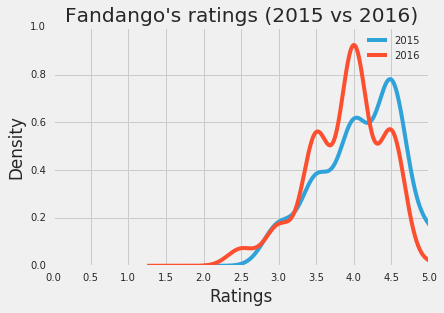

In [75]:
fandango_2015['Fandango_Stars'].plot.kde(label='2015', legend=True)
fandango_2016['fandango'].plot.kde(label='2016', legend=True)
plt.title("Fandango's ratings (2015 vs 2016)")
plt.xlabel('Ratings')
plt.xlim(0,5)
plt.xticks(np.arange(0,5.1,.5))
plt.style.use('fivethirtyeight')
plt.show()

Analyze the two kernel density plots. Try to answer the following questions:

-  What is the shape of each distribution? 

Approximately normal
-  How do their shapes compare?

Similar
-  If their shapes are similar, is there anything that clearly differentiates them?

2016 is less left skewed
-  Can we see any evidence on the graph that suggests that there is indeed a change between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016?

Yes - where 2015 ratings are stacked on very high ratings, 2016 ratings have a more even distribution
-  Provided there's a difference, can we tell anything about the direction of the difference? In other words, were movies in 2016 rated lower or higher compared to 2015?

2016 movies were rated lower

compare frequency distribution tables

In [77]:
print('2015')
print(fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100)
print('2016')
print(fandango_2016['fandango'].value_counts(normalize = True).sort_index() * 100)

2015
3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64
2016
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64


some observations: 
-  compared to 2015, less of the 2016 were very high (5 Star) ratings
-  the lowest rating in 2015 was 3 and 2.5 in 2016
-  generally the distribution shifted towards lower ratings in 2016 compared to 2015

In [83]:
fandango_2015_summary=fandango_2015['Fandango_Stars'].describe()
fandango_2016_summary=fandango_2016['fandango'].describe()

count    129.000000
mean       4.085271
std        0.538096
min        3.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: Fandango_Stars, dtype: float64
count    191.000000
mean       3.887435
std        0.509540
min        2.500000
25%        3.500000
50%        4.000000
75%        4.250000
max        5.000000
Name: fandango, dtype: float64


In [88]:
fandango_2015_mean=fandango_2015_summary.loc['mean']
fandango_2016_mean=fandango_2016_summary.loc['mean']
fandango_2015_median=fandango_2015['Fandango_Stars'].median()
fandango_2016_median=fandango_2016['fandango'].median()
fandango_2015_mode=fandango_2015['Fandango_Stars'].mode()[0]
fandango_2016_mode=fandango_2016['fandango'].mode()[0]

create a pandas series (table) for summary to process easier

In [89]:
summary_table = pd.DataFrame()
summary_table['2015'] = [fandango_2015_mean, fandango_2015_median, fandango_2015_mode]
summary_table['2016'] = [fandango_2016_mean, fandango_2016_median, fandango_2016_mode]
summary_table.index = ['mean', 'median', 'mode']
print(summary_table)

            2015      2016
mean    4.085271  3.887435
median  4.000000  4.000000
mode    4.500000  4.000000


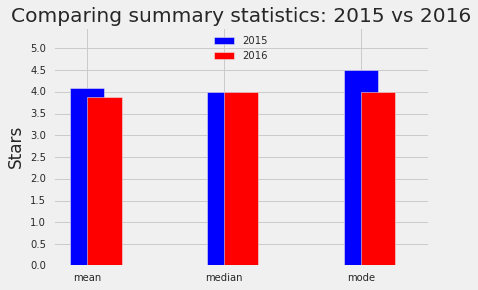

In [101]:
summary_table['2015'].plot.bar(color='blue', align = 'center', label = '2015', width=0.25, rot=0)
summary_table['2016'].plot.bar(color='red', align = 'edge', label = '2016', width=0.25, rot=0)
plt.title('Comparing summary statistics: 2015 vs 2016')
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.5,.5))
plt.ylabel('Stars')
plt.legend(loc = 'upper center')
plt.show()

analysis shows a slight difference between the ratings in 2015 and 2016